# Librerías

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
# import plotly.express as px
# import plotly.graph_objects as go
# import matplotlib.pyplot as plt
# import json

# Datos

In [4]:
df = pd.read_csv('../../Data/IPS_Atencion_Capacidad_Transformed.csv')

In [5]:
df

,codigo_sede,num nivel atencion,naturaleza,Adultos,Atención del Parto,Básica,Consulta Externa,Cuidado Agudo Mental,Cuidado Intensivo Adulto,Cuidado Intensivo Neonatal,...,Salud Mental Adulto,Salud Mental Pediátrico,Sillas de Hemodiálisis,Sillas de Quimioterapia,TPR,Transplante de progenitores hematopoyeticos,Unidad Móvil,Unidad de Quemados Adulto,Unidad de Quemados Pediátrico,Urgencias
0,50010001201,NaN,Privada,0,0,0,24,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50010016401,NaN,Privada,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,50010025201,NaN,Privada,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,50010025204,NaN,Privada,0,0,0,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50010029701,NaN,Privada,0,0,0,39,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15542,996240000609,2.0,Pública,6,0,2,4,0,0,0,...,0,0,0,0,2,0,0,0,0,1
15543,997730000607,2.0,Pública,12,0,3,5,0,0,0,...,0,0,0,0,2,0,0,0,0,1
15544,997730011401,NaN,Privada,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15545,997730013001,NaN,Privada,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_publicas = df[df['naturaleza'] == 'Pública'].copy()
df_publicas.dropna(inplace=True)
df_publicas['num nivel atencion'] = df_publicas['num nivel atencion'].astype('int64')

In [7]:
df_publicas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3312 entries, 79 to 15543
Data columns (total 62 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   codigo_sede                                  3312 non-null   int64 
 1   num nivel atencion                           3312 non-null   int64 
 2   naturaleza                                   3312 non-null   object
 3   Adultos                                      3312 non-null   int64 
 4   Atención del Parto                           3312 non-null   int64 
 5   Básica                                       3312 non-null   int64 
 6   Consulta Externa                             3312 non-null   int64 
 7   Cuidado Agudo Mental                         3312 non-null   int64 
 8   Cuidado Intensivo Adulto                     3312 non-null   int64 
 9   Cuidado Intensivo Neonatal                   3312 non-null   int64 
 10  Cuidado Intensi

In [8]:
df_publicas

,codigo_sede,num nivel atencion,naturaleza,Adultos,Atención del Parto,Básica,Consulta Externa,Cuidado Agudo Mental,Cuidado Intensivo Adulto,Cuidado Intensivo Neonatal,...,Salud Mental Adulto,Salud Mental Pediátrico,Sillas de Hemodiálisis,Sillas de Quimioterapia,TPR,Transplante de progenitores hematopoyeticos,Unidad Móvil,Unidad de Quemados Adulto,Unidad de Quemados Pediátrico,Urgencias
79,50010214401,3,Pública,176,0,0,0,0,48,10,...,0,0,0,4,0,0,0,0,0,0
87,50010217802,2,Pública,47,0,0,24,0,0,0,...,0,0,0,0,0,0,0,0,0,4
88,50010217804,2,Pública,43,0,0,13,0,0,0,...,0,0,0,0,0,0,0,0,0,7
89,50010217807,2,Pública,12,0,0,13,0,0,0,...,0,0,0,0,0,0,0,0,0,4
90,50010217808,2,Pública,34,0,24,22,0,0,0,...,0,0,0,0,0,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15535,976660000103,2,Pública,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15536,990010000601,2,Pública,15,0,3,11,0,0,0,...,0,0,0,0,6,0,1,0,0,2
15540,995240000608,2,Pública,6,0,2,4,0,0,0,...,0,0,0,0,2,0,0,0,0,1
15542,996240000609,2,Pública,6,0,2,4,0,0,0,...,0,0,0,0,2,0,0,0,0,1


## Desbalanceo

In [9]:
df_publicas.groupby(['num nivel atencion']).agg(count=('codigo_sede', 'count'))

,count
num nivel atencion,
1,2738
2,416
3,158


# Modelo

## X and Y

In [10]:
y = df_publicas['num nivel atencion'].copy()
X = df_publicas[list(df_publicas.columns)[3:]].copy()

## Train - Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1, shuffle=True)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2318, 59), (994, 59), (2318,), (994,))

## Oversampling

In [13]:
sm = SMOTE(random_state=1)
X_train_resample, y_train_resample = sm.fit_resample(X_train, y_train)

In [36]:
ros = RandomOverSampler(random_state=1)
X_train_resample, y_train_resample = ros.fit_resample(X_train, y_train)

In [14]:
X_train_resample.shape, X_test.shape, y_train_resample.shape, y_test.shape

((5715, 59), (994, 59), (5715,), (994,))

In [15]:
counter = Counter(y)
counter1 = Counter(y_train)
counter2 = Counter(y_train_resample)

In [16]:
counter, counter1, counter2

(Counter({1: 2738, 2: 416, 3: 158}),
 Counter({1: 1905, 2: 294, 3: 119}),
 Counter({1: 1905, 2: 1905, 3: 1905}))

## Scale

In [17]:
scaler = StandardScaler()
scaler.fit(X_train_resample)
X_train_scaled = scaler.transform(X_train_resample)
X_test_scaled = scaler.transform(X_test)

## Training

In [30]:
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train_scaled, y_train_resample)

KNeighborsClassifier()

## Testing

In [31]:
predictions = clf_knn.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions)

## SMOTE

### K = 1

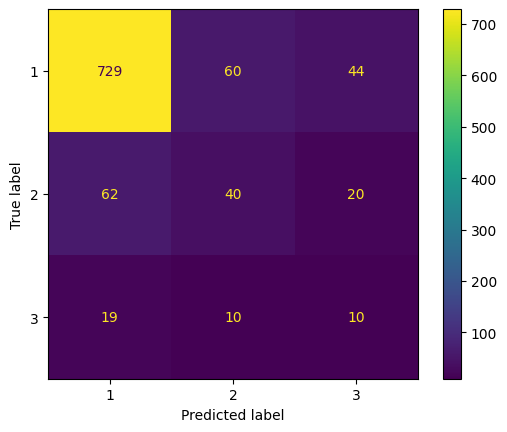

In [20]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_knn.classes_)
disp.plot()

In [21]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.90      0.88      0.89       833
           2       0.36      0.33      0.34       122
           3       0.14      0.26      0.18        39

    accuracy                           0.78       994
   macro avg       0.47      0.49      0.47       994
weighted avg       0.80      0.78      0.79       994



### K = 3

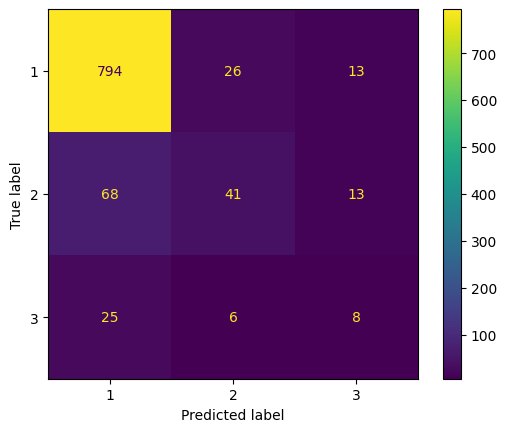

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_knn.classes_)
disp.plot()

In [25]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.90      0.95      0.92       833
           2       0.56      0.34      0.42       122
           3       0.24      0.21      0.22        39

    accuracy                           0.85       994
   macro avg       0.56      0.50      0.52       994
weighted avg       0.83      0.85      0.83       994



### K = 4

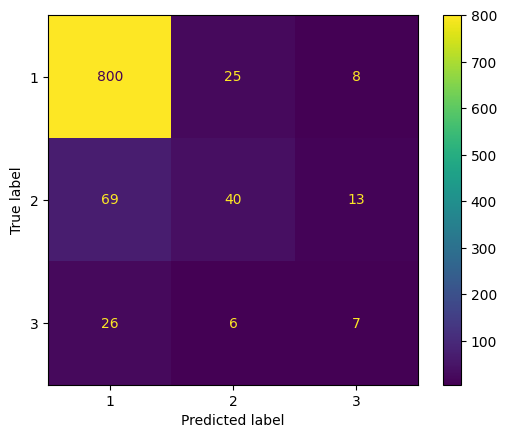

In [28]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_knn.classes_)
disp.plot()

In [29]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.89      0.96      0.93       833
           2       0.56      0.33      0.41       122
           3       0.25      0.18      0.21        39

    accuracy                           0.85       994
   macro avg       0.57      0.49      0.52       994
weighted avg       0.83      0.85      0.84       994



### K = 5

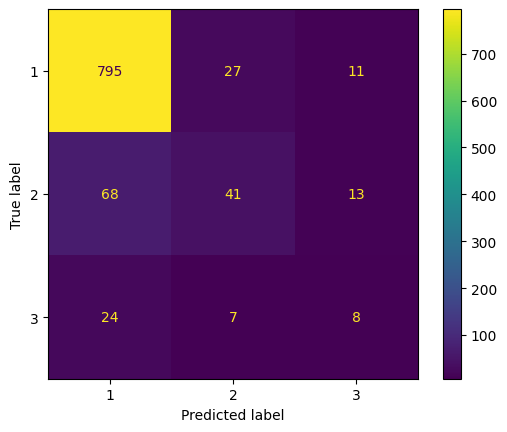

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_knn.classes_)
disp.plot()

In [33]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.90      0.95      0.92       833
           2       0.55      0.34      0.42       122
           3       0.25      0.21      0.23        39

    accuracy                           0.85       994
   macro avg       0.56      0.50      0.52       994
weighted avg       0.83      0.85      0.83       994



## Random Over Sampler

### K = 1

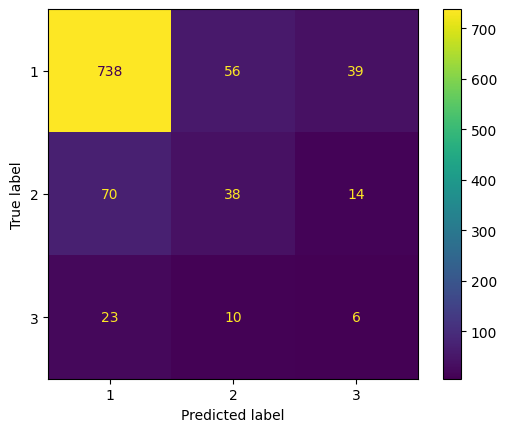

In [78]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_knn.classes_)
disp.plot()

In [79]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.89      0.89      0.89       833
           2       0.37      0.31      0.34       122
           3       0.10      0.15      0.12        39

    accuracy                           0.79       994
   macro avg       0.45      0.45      0.45       994
weighted avg       0.79      0.79      0.79       994



### K = 3

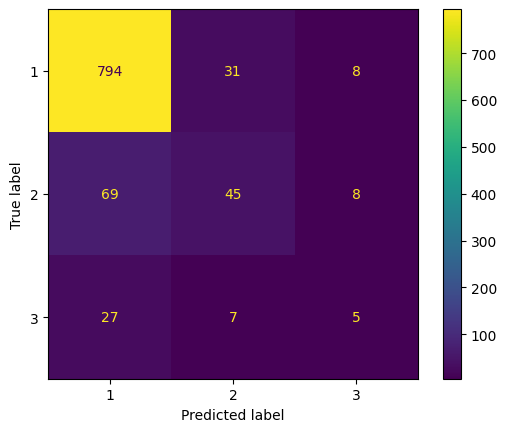

In [57]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_knn.classes_)
disp.plot()

In [58]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.89      0.95      0.92       833
           2       0.54      0.37      0.44       122
           3       0.24      0.13      0.17        39

    accuracy                           0.85       994
   macro avg       0.56      0.48      0.51       994
weighted avg       0.82      0.85      0.83       994



### K = 4

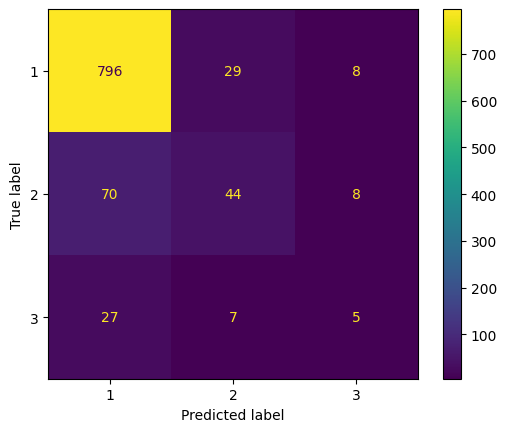

In [65]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_knn.classes_)
disp.plot()

In [66]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.89      0.96      0.92       833
           2       0.55      0.36      0.44       122
           3       0.24      0.13      0.17        39

    accuracy                           0.85       994
   macro avg       0.56      0.48      0.51       994
weighted avg       0.82      0.85      0.83       994



### K = 5

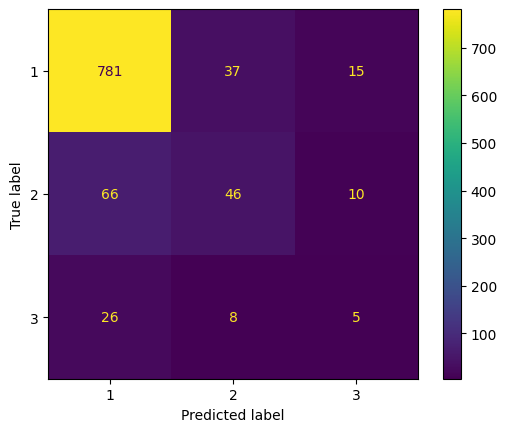

In [69]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_knn.classes_)
disp.plot()

In [70]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.89      0.94      0.92       833
           2       0.51      0.38      0.43       122
           3       0.17      0.13      0.14        39

    accuracy                           0.84       994
   macro avg       0.52      0.48      0.50       994
weighted avg       0.82      0.84      0.83       994

